## Step 0: Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/root/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('data.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


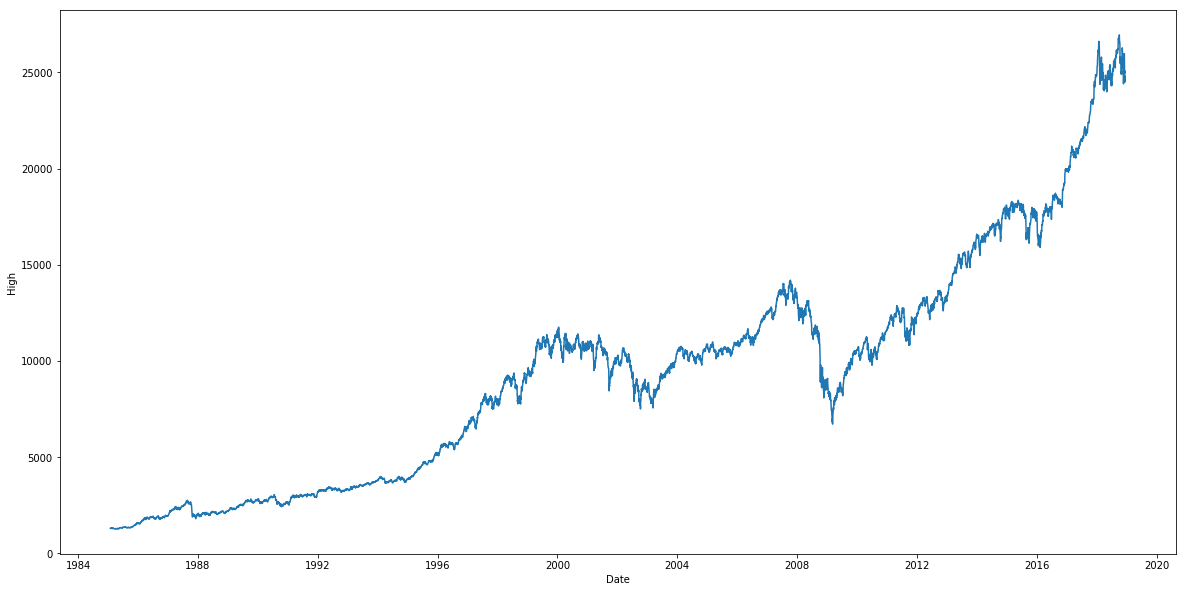

In [3]:
ax, fig = plt.subplots(figsize=(20,10))
sns.lineplot(x = df['Date'], y = df['High'])

In [4]:
df_date = df.set_index('Date')

In [5]:
X_train = df_date[:'2017']
X_test = df_date['2017':]

In [6]:
X_train.shape, X_test.shape

((8300, 6), (489, 6))

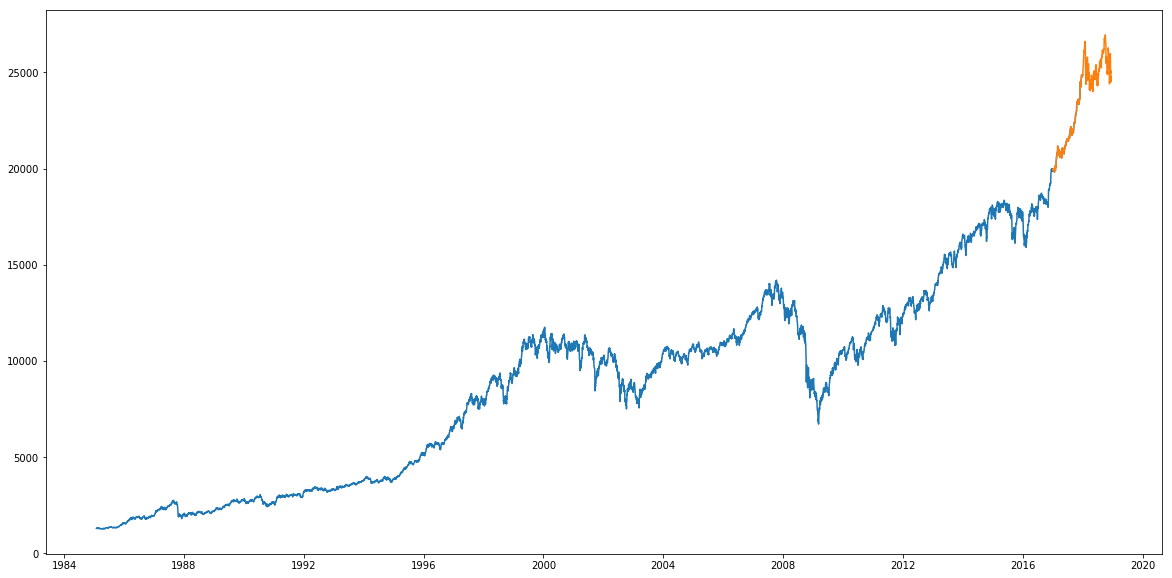

In [7]:
ax, fig = plt.subplots(figsize=(20,10))
plt.plot(X_train['High'])
plt.plot(X_test['High'])

In [121]:
X_train_high = X_train['High']
X_test_high = X_test['High']

In [122]:
X_train_high = np.array(X_train_high)
X_test_high = np.array(X_test_high)

In [123]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler()
sc.fit(X_train_high.reshape(-1,1))
X_train_scaled = sc.transform(X_train_high.reshape(-1,1))
X_test_scaled = sc.transform(X_test_high.reshape(-1,1))


In [154]:
X_train_new = []
y_train_new = []
for i in range(75,len(X_train_scaled)):
    X_train_new.append(X_train_scaled[i-75:i,0])
    y_train_new.append(X_train_scaled[i,0])
    
X_train_new, y_train_new = np.array(X_train_new), np.array(y_train_new)

In [167]:
X_train_new.shape, y_train_new.shape

((8225, 75), (8225,))

In [155]:
print(len(X_train_scaled.shape))
test = X_train_scaled[len(X_train_scaled[0])-75:]
test.shape

2


(74, 1)

In [156]:
test.shape, X_test_scaled.shape

((74, 1), (489, 1))

In [157]:
test_list = np.vstack([test, X_test_scaled])
test_list.shape

(563, 1)

In [159]:
X_test_new = []
y_test_new = []
for i in range(75,len(test_list)):
    X_test_new.append(test_list[i-75:i,0])
    y_test_new.append(test_list[i,0])
    
X_test_new, y_test_new = np.array(X_test_new), np.array(y_test_new)

In [160]:
X_test_new.shape, test.shape

((488, 75), (74, 1))

In [161]:
y_test_new[4]

0.791789195842439

In [162]:
X_train_new[0] , y_train_new[0]

(array([0.0018743 , 0.00228107, 0.00178583, 0.00147726, 0.00185102,
        0.00211303, 0.00183239, 0.00193991, 0.00194456, 0.00171557,
        0.00135112, 0.00226245, 0.00238393, 0.00190732, 0.00153313,
        0.00174816, 0.00151916, 0.00149589, 0.00135112, 0.00177652,
        0.00186499, 0.0015708 , 0.00248679, 0.00225779, 0.00206605,
        0.00193525, 0.00135578, 0.00125292, 0.00109377, 0.00119662,
        0.00114541, 0.00076191, 0.00066371, 0.00041143, 0.00097228,
        0.00110816, 0.00117334, 0.00110816, 0.00072466, 0.00069207,
        0.00083218, 0.00102858, 0.00082286, 0.00106117, 0.00122498,
        0.00071535, 0.00055154, 0.00066879, 0.00045842, 0.00075725,
        0.00100064, 0.00081355, 0.00089779, 0.00107514, 0.00111281,
        0.00129948, 0.00090244, 0.000949  , 0.00134181, 0.00149122,
        0.00160805, 0.00165462, 0.00113143, 0.00063577, 0.00049101,
        0.        , 0.00011217, 0.00021969, 0.00043006, 0.0003272 ,
        0.00060783, 0.00132276, 0.00136974, 0.00

In [163]:
X_test_new[0] , y_test_new[0]

(array([0.88990196, 0.89331361, 0.89459999, 0.89575343, 0.89601799,
        0.8936815 , 0.893494  , 0.89389479, 0.89396887, 0.89496953,
        0.89543052, 0.90193849, 0.90561849, 0.9072955 , 0.91115159,
        0.91100898, 0.9122661 , 0.91426148, 0.91520882, 0.91571379,
        0.91658193, 0.91890106, 0.92068224, 0.92790897, 0.92766814,
        0.93450838, 0.93618158, 0.94112895, 0.93970078, 0.94005338,
        0.9396115 , 0.9387374 , 0.93778923, 0.94250297, 0.94308159,
        0.94416857, 0.94492196, 0.94607582, 0.94492792, 0.94246188,
        0.93972997, 0.94013126, 0.93811645, 0.93519199, 0.94142269,
        0.93894987, 0.93992813, 0.9467396 , 0.94623034, 0.9459514 ,
        0.94763354, 0.95655166, 0.96121414, 0.97679351, 0.97654971,
        0.9855224 , 0.97772135, 0.97262542, 0.97404474, 0.97689082,
        0.97941365, 0.98632375, 0.99110891, 0.99138239, 0.99206551,
        1.        , 0.99890112, 0.99899975, 0.99893501, 0.99610919,
        0.99585439, 0.99633645, 0.99844063, 0.99

In [164]:
len(X_train_new) , len(X_train_new[0])

(8225, 75)

In [165]:
len(X_test_new) , len(X_test_new[0])

(488, 75)

In [168]:
X_train_new = np.reshape(X_train_new , newshape=(8225,75,1))
y_train_new = np.reshape(y_train_new , newshape=(8225,1))
X_test_new = np.reshape(X_test_new , newshape=(488,75,1))
y_test_new = np.reshape(y_test_new , newshape=(488,1))

### Or we can just use the concept of Embedding Matrix. Because One Hot Encoding will create a matrix of dimensions 25000 * 10000 and most of values will be zeros. Dimensions are of the order Number_of_Reviews * Max_length

## Step 4: Modelling Data

In [169]:
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM, SimpleRNN, Dropout, Flatten
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.optimizers import Adam

### I have used the approach of Embedding Matrix Here

In [173]:
embedding_vector_length = 32

model = Sequential()

#model.add(Embedding(60, embedding_vector_length))

model.add(LSTM(50, return_sequences= True , input_shape = (75,1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences= True ))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences= True ))
model.add(Dropout(0.2))
model.add(LSTM(50 ))

model.add(Dense(1, activation='linear'))

In [174]:
model.compile(loss='mse', optimizer='Adam')

In [175]:
model.fit(X_train_new, y_train_new, epochs=10, batch_size=32, validation_split=0.1)

Train on 7402 samples, validate on 823 samples
Epoch 1/10
7402/7402 [==============================] - 47s - loss: 0.0036 - val_loss: 0.0011
Epoch 2/10
7402/7402 [==============================] - 45s - loss: 3.4042e-04 - val_loss: 0.0018
Epoch 3/10
7402/7402 [==============================] - 45s - loss: 2.7409e-04 - val_loss: 9.2598e-04
Epoch 4/10
7402/7402 [==============================] - 45s - loss: 2.2516e-04 - val_loss: 7.3816e-04
Epoch 5/10
7402/7402 [==============================] - 45s - loss: 2.2076e-04 - val_loss: 9.5449e-04
Epoch 6/10
7402/7402 [==============================] - 45s - loss: 1.9937e-04 - val_loss: 9.4665e-04
Epoch 7/10
7402/7402 [==============================] - 45s - loss: 1.8400e-04 - val_loss: 5.3577e-04
Epoch 8/10
7008/7402 [===========================>..] - ETA: 2s - loss: 1.9691e-04

KeyboardInterrupt: 

In [28]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_22 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
dropout_20 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_23 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 50)                20200     
__________

## Step 5: Saving Model

In [148]:
model.save_weights('model_v1.h5')

## Step 6: Visualizing the Losses and Accuracy

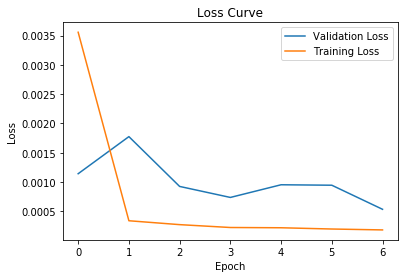

In [176]:
val_loss = model.model.history.history['val_loss']
tra_loss = model.model.history.history['loss']

plt.plot(val_loss)
plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

In [40]:
val_acc = model.model.history.history['val_acc']
tra_acc = model.model.history.history['acc']

plt.plot(val_acc)
plt.plot(tra_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.show()

KeyError: 'val_acc'

## Step 7: Testing Your Neural Network

In [41]:
scores = model.evaluate(X_test_new, y_test_new, verbose=0)
print("Test Accuracy: " , (scores[0]*100))

IndexError: invalid index to scalar variable.

In [150]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [177]:
y_pred = model.predict(X_test_new)

In [178]:
y_pred = sc.inverse_transform(y_pred)

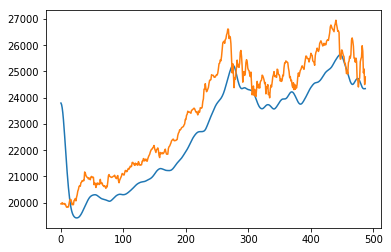

In [179]:
plt.plot(y_pred)
plt.plot( sc.inverse_transform(y_test_new))

In [ ]:
print(classification_report(y_test , y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(X_test_padded[0])

In [ ]:
print(' '.join(decode_review(X_test[0])))

In [ ]:
def ReturnSentiment(test):
    test_pred = model.predict(test.reshape(1,500))
    if(test_pred > 0.5):
        return 'Positive'
    else:
        return 'Negative'


In [ ]:
ReturnSentiment(X_test_padded[0])

In [ ]:
print(' '.join(decode_review(X_test[30])))

In [ ]:
ReturnSentiment(X_test_padded[30])